### Лабораторная работа №5
#### Идентификация параметров линейного регрессионного объекта при α− загрязненных шумах

Вар 14

Пусть линейный регрессионный объект имеет вид:
$$ \large y(i)=с_{0}+с_{1}u_{1}(i)+...+с_{4}u_{4}(i)+\eta(i) , $$ 

где шум, действующий на объект, принадлежит классу приближенно нормальных распределений:
$ \large f(\eta) = (1-\alpha)f_N(\eta) + \alpha g(\eta) $ <br>
$ \large f_N(\eta) = \frac{1}{\sqrt{2 \pi} \sigma_\eta} exp(- \frac{\eta^2}{2 \sigma^2_\eta}) $ - нормальное распределение $ \large N(0, \sigma_\eta)$, <br>
$\large \alpha$ - вероятность появление выброса с рапределением $\large g(\eta)$ <br>
$\large g(\eta)$ - вообще говоря какое-то распределение, но в данной лабораторной работе будет нормальным $ \large N(0, \sigma_\eta (outlier))$, но его параметры отличны от $\large f_N(\eta)$

In [1]:
import math
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
# параметры объекта 
c0=3.5
c1=-0.3
c2=0.
c3=6.
c4=-2.2

In [3]:
# количество измерений
N=200

#### Сгенерируем шум, принадлежащий классу приближенно нормальных распределений

In [4]:
import numpy as np
from scipy.stats import rv_continuous

In [5]:
# класс для "загрязненного" распределения
class gaussian_gen(rv_continuous):
    
    def _pdf(self, x, alpha, sigma_1, sigma_2):
        "Gaussian distribution"
        def gaussian(self, x, sigma):
            return np.exp(-x**2 / 2. / sigma**2) / (np.sqrt(2.0 * np.pi)*sigma)
        
        return (1-alpha)*gaussian(self, x, sigma_1)+alpha*gaussian(self, x, sigma_2)

gaussian = gaussian_gen(name='dirty_distrib')

Зададим следующие параметры нашего загрязненного распределения для шума:

In [33]:
alpha = 0.3
ksi=0.9
sigma_1 = 0.5
sigma_2 = 50
Noise = gaussian.rvs(alpha, sigma_1, sigma_2, size=N)

#### Посмотрим на сгенерированный шум и увидим "выбросы" из другого распределения

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

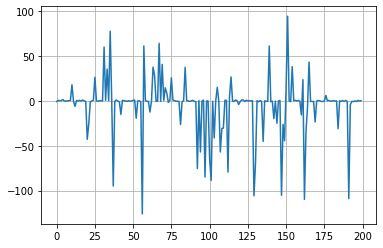

In [35]:
plt.plot(Noise)
plt.grid()

#### Зададим параметры входов объекта и смоделируем выход объекта

In [9]:
Avg_U1=1
Var_U1=100
Avg_U2=1
Var_U2=100
Avg_U3=1
Var_U3=100
Avg_U4=1
Var_U4=100

In [10]:
#Ваш код здесь
U1=np.random.normal(Avg_U1, Var_U1, N)
U2=np.random.normal(Avg_U2, Var_U2, N)
U3=np.random.normal(Avg_U3, Var_U3, N)
U4=np.random.normal(Avg_U4, Var_U4, N)

In [11]:
# моделирование выхода объекта
y=np.array(c0+c1*U1+c2*U2+c3*U3+c4*U4+Noise)

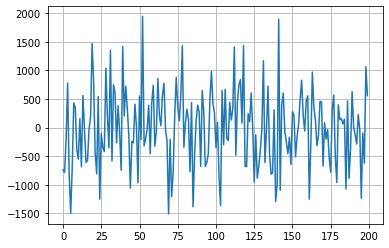

In [12]:
plt.plot(y)
plt.grid()

### Эффективность алгоритма Хубера vs Рекуррентным МНК при различных статистических характеристиках распределений

В лабораторной работе требуется:

1. Реализовать __class Huber__ c методами: <br>
   * в конструкторе класса небходимо задать:<br>
     1) λ в формуле задания начального приближения матрицы Г(0) = λ*I <br>
    2) параметр $ \xi $, участвующий в функции потерь Хьюбера, в зависимости от вероятности появления выброса $ \alpha $ (значения которого приведены в описании ЛР) <br><br>
   *   __def fit(X, y, c0)__ - метод реализует алгоритм итерационного оценивания параметов объекта с использованием функции потерь Хьюбера:<br>
        <br>
        Input:<br>
            X - матрица входов объекта, [X] = m x N <br>
            y - вектор выходов объекта, [y] = N <br>
            с0 - вектор начального приближения, [c0] = m <br>
        <br>       
   * __def get_coefs()__ - метод возвращает массив коэффициентов оценок вектора параметров объекта, получаемого на каждом новом шаге измерений<br>
        <br>
        Output:<br>
            c_estim_huber - массив оценок параметров объекта, полученный в результате работы метода fit<br><br>
2. Реализовать __class RecurrentMLS__ с методами: <br>

    * в конструкторе класса небходимо задать:<br>
     1) λ в формуле задания начального приближения матрицы Г(0) = λ*I <br><br>

    * __def fit(X, y, c0)__ - метод реализует алгоритм итерационного оценивания параметов объекта с использованием квадратичной функции потерь (см. 2 лабораторную работу):<br>
         <br>
     Input:<br>
             X - матрица входов объекта, [X] = m x N<br>
             y - вектор выходов объекта, [y] = N<br>
             с0 - вектор начального приближения, [c0] = m+1<br><br>
        
    * __def get_coefs()__ - метод возвращает массив коэффициентов оценок вектора параметров объекта, получаемого на каждом новом шаге измерений<br>
        <br>
        Output:<br>
            c_estim_recMLS - массив оценок параметров объекта, полученный в результате работы метода fit<br><br>        
3. Реализовать функцию __smooth_errors(c_estim, c_true)__  - вычисляет сглаженную ошибку оценки по 10 измерениям. <br>
         Input: 
             c_estim - массив оценок параметров объекта, [c_estim] = m+1 x N
             c_true - вектор истинных параметров объекта, [c_true] = m+1 
         Output:
             err - массив сглаженных ошибок оценки
              
4. Провести исследование эффективности алгоритма Хубера по сравнению с рекуррентным МНК алгоритмом при следующих статистических характеристиках распределений:<br>
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.1    $\sigma_\eta (outlier)$ = 10;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.1    $\sigma_\eta (outlier)$ = 50;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.1    $\sigma_\eta (outlier)$ = 100;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.3    $\sigma_\eta (outlier)$ = 10;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.3    $\sigma_\eta (outlier)$ = 50;
    * $ \sigma_\eta $ = 0.5    $\alpha$ = 0.3    $\sigma_\eta (outlier)$ = 100. <br><br>
5. Построить графики сходимости сглаженной ошибки оценки по двум алгоритмам: алгоритм с использованием теоремы Хубера и рекуррентный алгоритм, соответствующий методу наименьших квадратов. Сдалать выводы.

### Hints

1. Рекуррентный алгоритм при функции потерь Хьюбера имеет вид:
\begin{equation} \large \hat{\vec{c}}(i)=\hat{\vec{c}}(i-1)+Г(i)d(\varepsilon(i, \hat{\vec{c}}(i-1)))\vec{z}(i) \\
\large Г(i)=Г(i-1)-\frac{Г(i-1)\vec{z}(i)\vec{z}(i)^TГ(i-1)}{I^{-1}_F+\vec{z}^T(i)Г(i-1)\vec{z}(i)} \\
\large Г(0)=\lambda I, \lambda >> 1,  \hat{\vec{c}}(0)=\vec{c}_{0}\end{equation}

где $ \large  \Delta = \xi\sigma_\eta$
\begin{equation} \large d(\varepsilon(i, \hat{\vec{c}}(i-1)))=\frac{dF(\varepsilon(i, \hat{\vec{c}}(i-1)))}{d\varepsilon}|_{\varepsilon = \varepsilon(i, \hat{\vec{c}}(i-1)))}= \left\{
    \begin{array}\\
        -\Delta, & \varepsilon(i) \leq -\Delta \\
        \varepsilon(i, \hat{\vec{c}}(i-1))), & -\Delta \leq |\varepsilon(i)| \leq \Delta\\
        \Delta, &  \varepsilon(i) \geq \Delta
    \end{array}  
\right.\end{equation}

\begin{equation} \large  I_F=2(1-\alpha)\frac{\Delta}{\sigma^2_\eta}f_N(\frac{\Delta}{\sigma_\eta})+(1-\alpha)\frac{1}{\sqrt{2\pi}\sigma_\eta}\frac{1}{\sigma^4_\eta}\int_{-\Delta}^\Delta \eta^2exp(\frac{-\eta^2}{2\sigma^2_\eta})d\eta\end{equation}

2. Для вычислении информации Фишера можно использовать модуль __sympy__ (https://docs.sympy.org/latest/modules/integrals/integrals.html)

In [13]:
c = np.array([3.5, -0.3, 0., 6., -2.2])
c_avgs = np.ones(5, dtype=np.float64)
c_vars = np.ones(5, dtype=np.float64) * 100
N=200

print(f"c_vars\t{c_vars}\nc_avgs\t{c_avgs}\nc\t{c}\nN\t{N}")

c_vars	[100. 100. 100. 100. 100.]
c_avgs	[1. 1. 1. 1. 1.]
c	[ 3.5 -0.3  0.   6.  -2.2]
N	200


In [14]:
Us = np.array([U1, U2, U3, U4])

In [15]:
import math
from scipy.integrate import quad

class Huber:
    def __init__(self, lamb, ksi):
        self.lamb = lamb
        self.ksi = ksi
        
        # Fisher
        self.delta = self.ksi * sigma_1
        def integr(eta):
            return eta ** 2 * math.exp(-eta ** 2 / 2 / sigma_1 ** 2)
        
        def calc_fN(eta):
            return math.exp(-eta * eta / 2 / sigma_1 / sigma_1) / pow(2 * math.pi, 0.5) / sigma_1

        self.If = (
            2 * (1 - alpha) * self.delta / sigma_1 / sigma_1 * calc_fN(self.ksi)
            + (1 - alpha) / pow(2 * math.pi, 0.5) / pow(sigma_1, 5) * quad(integr, -self.delta, self.delta)[0]
        )

        self.c_estim_huber = []
    
    def fit(self, X, y, c0):
        C = c0
        self.c_estim_huber.append(c0)
        G = self.lamb * np.eye(5)
        for i in range(N):
            x_expanded = np.array([1, X[0, i], X[1, i], X[2, i], X[3, i]])
            y_hat = np.sum(np.ravel(C[:,0]) * x_expanded)
            eps = y[i] - y_hat
            
            d_eps = eps
            if eps <= -self.delta:
                d_eps = -self.delta
            elif eps >= self.delta:
                d_eps = self.delta

            z = np.matrix(x_expanded).T    
            G = G - G * z * z.T * G / (pow(self.If, -1) + z.T * G * z)
            C = C + G * d_eps * z
            self.c_estim_huber.append(C)
    
    def get_coefs(self):
        return self.c_estim_huber
    

In [16]:
a = Huber(0.1, ksi)
a.fit(Us, y, np.matrix(c).T)
coefs_huber = a.get_coefs()

print('delta y - y_hat')
c - np.ravel(coefs_huber[-1])

delta y - y_hat


array([-0.0133126 ,  0.00055885,  0.00080968,  0.00061897, -0.00019005])

In [17]:
class RecurrentMLS:
    def __init__(self, lamb):
        self.lamb = lamb     
        self.c_hat = []
    
    def fit(self, X, y, c0):
        C = c0
        self.c_hat.append(c0)
        G = self.lamb * np.eye(5)
        for i in range(N):
            x_expanded = np.array([1, X[0][i], X[1][i], X[2][i], X[3][i]])
            yhat = np.sum(np.ravel(C[:, 0]) * x_expanded)
            eps = y[i] - yhat
            z = np.matrix(x_expanded).T    
            G = G - G * z * z.T * G / (1 + z.T * G *z)
            C = C + G * eps * z
            self.c_hat.append(C)
    
    def get_coefs(self):
        return self.c_hat


In [18]:
recmls = RecurrentMLS(0.1)

recmls.fit(Us, np.array(y), np.matrix([2., -2., -1., 4., -1]).T)
coefs_recmls = recmls.get_coefs()
print('delta y - y_hat')
c - np.ravel(coefs_recmls[-1])

delta y - y_hat


array([ 5.40267013e-02,  7.03628380e-05,  4.15856077e-03, -2.04526663e-03,
       -7.66901572e-04])

In [19]:
def smooth_errors(c_estim, c_true):
    c_estim  = np.array(c_estim)
    c_true = np.array(c_true)
    res = []
    for i in range(9, N):
        err = 0
        for j in range(10):
            for k in range(5):
                err += (c_estim[i - j][k, 0] - c_true[k]) ** 2
        err /= 10
        err = err ** 0.5
        res.append(err)

    return res

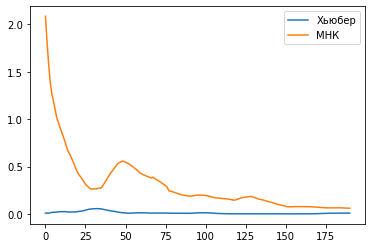

In [20]:
plt.plot(smooth_errors(coefs_huber, c), label='Хьюбер')
plt.plot(smooth_errors(coefs_recmls, c), label='МНК')

plt.legend()

In [41]:
def plotplots(scale=None):

    iternum = 0
    for alpha_ in [0.1, 0.3]:
        for sigma_outlier in [10, 50, 100]:
            iternum += 1
            plt.figure(iternum)

            alpha = alpha_
            sigma_2 = sigma_outlier

            np.random.seed(10)
            print(alpha, sigma_1, sigma_2)

    #       у меня OverflowError воспроизводится при sigma_2 == 100 для любых alpha
            if sigma_2 == 100:
                continue
                
            Noise = gaussian.rvs(alpha, sigma_1, sigma_2, size=N)
            y=np.array(c0+c1*U1+c2*U2+c3*U3+c4*U4+Noise)

            a = Huber(0.1, ksi)
            a.fit(Us, y, np.matrix(c).T)
            coefs_huber = a.get_coefs()

            recmls = RecurrentMLS(0.1)
            recmls.fit(Us, y, np.matrix([2., -2., -1., 4., -1]).T)
            coefs_recmls = recmls.get_coefs()

            plt.plot(smooth_errors(coefs_huber, c), label=f'Хьюбер')
            plt.plot(smooth_errors(coefs_recmls, c), label=f'МНК')
            plt.title(f"Сглаженные ошибки при alpha={alpha} sigma2={sigma_2}")
            if scale is not None:
                plt.yscale(scale)

            plt.legend()

0.1 0.5 10
0.1 0.5 50
0.1 0.5 100
0.3 0.5 10
0.3 0.5 50
0.3 0.5 100


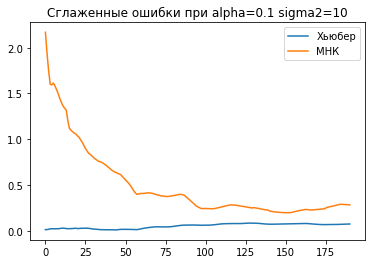

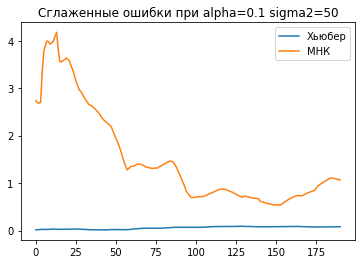

<Figure size 432x288 with 0 Axes>

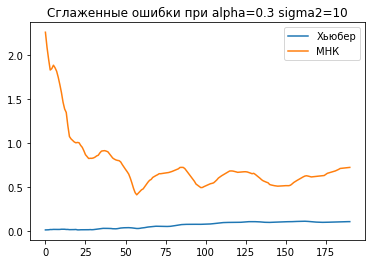

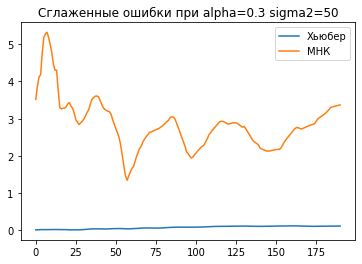

<Figure size 432x288 with 0 Axes>

In [42]:
plotplots()

0.1 0.5 10
0.1 0.5 50
0.1 0.5 100
0.3 0.5 10
0.3 0.5 50
0.3 0.5 100


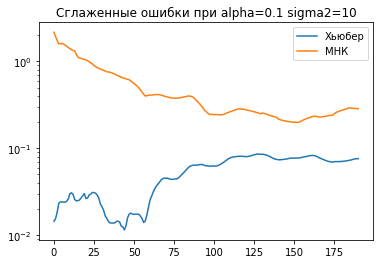

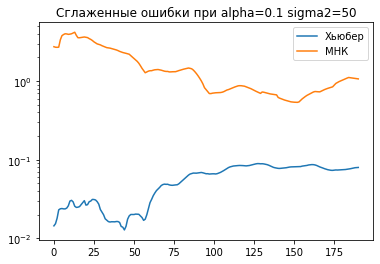

<Figure size 432x288 with 0 Axes>

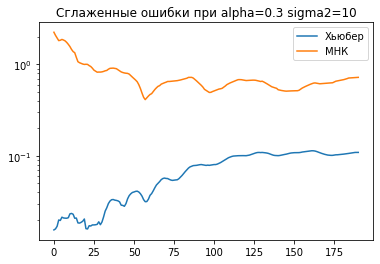

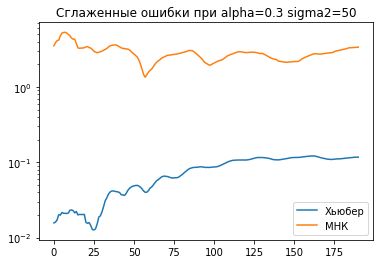

<Figure size 432x288 with 0 Axes>

In [43]:
plotplots(scale='log')